# Lab2
In this lab session, some DNA sequences are given. My task is to find out and analyze the relationship between them.

## Getting Data
Download seqs.fa from bcourses and move it to the Jupyter home folder. This is a FASTA format file.

## Generating a phylogenetic tree
Alignment is one of the most fundamental algorithms in computational biology. When sequences are aligned, each matched column shows base pairs that are conserved and others are mutations throughout years of evolution. Multiple sequence alignment is used to draw the tree.

1. Use the following line to get MUSCLE `wget http://www.drive5.com/muscle/downloads3.8.31/muscle3.8.31_i86linux64.tar.gz`
2. Extract and include its directory to `PATH`
3. Run command `muscle -in seqs.fa -out seqs.aligned.fa` and wait.
4. Examine the generated file. There are multiple dashes in new sequences and the order of the sequence is changed.
5. Download another tool called fasttree using the following command: `wget ttp://microbesonline.org/fasttree/FastTree`. Grant executable premissions and include in `PATH`
6. Run command `fasttree -nt < seqs.aligned.fa > tree.nwk` to generate the newick format tree
7. Visualize the tree:

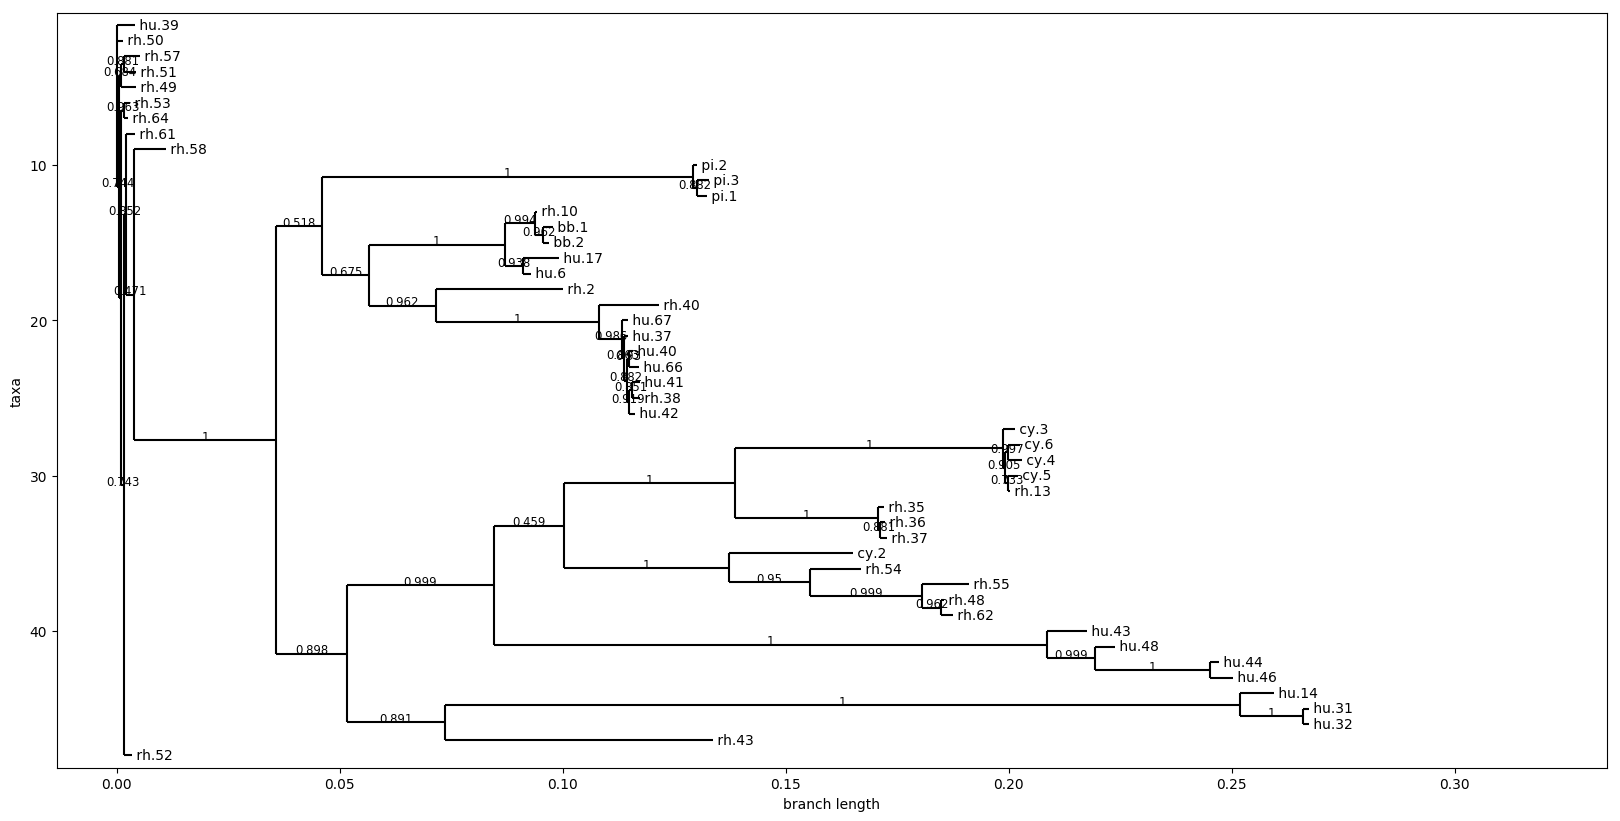

In [1]:
%matplotlib inline
from Bio import Phylo
import matplotlib.pyplot as plt

tree = Phylo.read('tree.nwk', 'newick')
# set tree size
fig = plt.figure(figsize=(20, 10), dpi=100)
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(tree, axes=axes)

Three clusters are distinguished in this tree. Take the top one of each cluster as a representative: hu.39, pi.2, cy.3

## Identifyling sequences by BLAST
Comparing of sequences are not confined in given file but works with external databases as well. This procedure is named BLAST.

First, sequences of representative specimens above needs to be picked out:

In [2]:
from Bio import SeqIO
specimens = ['hu.39', 'pi.2', 'cy.3']
for rec in SeqIO.parse('seqs.fa', 'fasta'):
    if rec.name in specimens:
        print('>', rec.name, '\n', rec.seq)

> cy.3 
 atggctgccgatggttatcttccagattggctcgaggacaacctctctgagggcattcgcgagtggtgggacttgaaacctggagccccgaaacccaaagccaaccagcaaaagcaggacgacggccggggtctggtgcttcctggctacaagtacctcagacccttcaacggactcgacaagggagagccggtcaacgaggcagacgccgcggccctcgagcacgacaaggcctacgacaagcagctcgagcagggggacaacccgtacctcaagtacaaccacgccgacgccgagtttcaggagcgtcttcaagaagatacgtcttttgggggcaacctcgggcgagcagtcttccaggccaagaagcgggttctcgaacctctcggtctggttgaggaagtcgctaagacggctcctggaaagaagagacccatagaatcccccgactcctccacgggcatcggcaagaaaggccagcagcccgctaaaaagaagctcaactttgggcagactggcgactcagagtcagtgcccgacccccaacctctcggagaacctcccgccgcgccctcaggtctgggatctggtacaatggctgcaggcggtggcgcaccaatggcagacaataacgaaggcgccgacggagtgggtaatgcctccggaaattggcattgcgattccacatggctgggcgacagagtcatcaccaccagcacccgcacctgggccctgcccacctacaacaaccacctctacaagcagatatcaagtcagagcggggctaccaacgacaaccacttcttcagctacagcaccccctggggctattttgacttcaacagattccactgccacttctcaccacgtgactggcagcgactcatcaacaacaactggggattccggcccagaaagctgcggttcaagttgttcaacatccaggtcaaggaggtcacgacgaacgacggcgttacgaccatcgctaata

Then, go to the website [NCBI BLAST](https://blast.ncbi.nlm.nih.gov/Blast.cgi) and enter **Nucleotides** portal. Paste each sequence and choose parameter `nt/nt`.

Top 3 match for each specimen are:

- cy.3
    - Non-human primate Adeno-associated virus isolate AAVcy.3 capsid protein (VP1) gene, complete cds
    - Non-human primate Adeno-associated virus isolate AAVrh.13 capsid protein (VP1) gene, complete cds
    - Adeno-associated virus isolate cy.5R4 capsid protein VP1 gene, partial cds 
- hu.39
    - Adeno-associated virus isolate hu.39 capsid protein VP1 (cap) gene, complete cds
    - Adeno-associated virus isolate rh.64R1 capsid protein VP1 gene, partial cds 
    - Adeno-associated virus isolate rh.46 capsid protein VP1 gene, partial cds
- pi.2
    - Adeno-associated virus isolate pi.2 capsid protein VP1 (cap) gene, complete cds
    - Adeno-associated virus isolate pi.1 capsid protein VP1 (cap) gene, complete cds
    - Adeno-associated virus isolate pi.3 capsid protein VP1 (cap) gene, complete cds

All the sequences above match the capsid protein gene of **Adeno-associated virus (AAV)** of some isolates.  
However, there are irrelavent genes such the genome of _Arthrobacter sp._ of around 90% indentical. It could be due to vertical gene transmission.

Different species could share genes with great identity, but it is possible that the function of these genes in different species are not the same (e.g. not expressed in one species). So annotations can not be 100% trusted.

Total base pair:  2238 . It is too numeric to show. Thus only GC content of first  200  bp is shown.


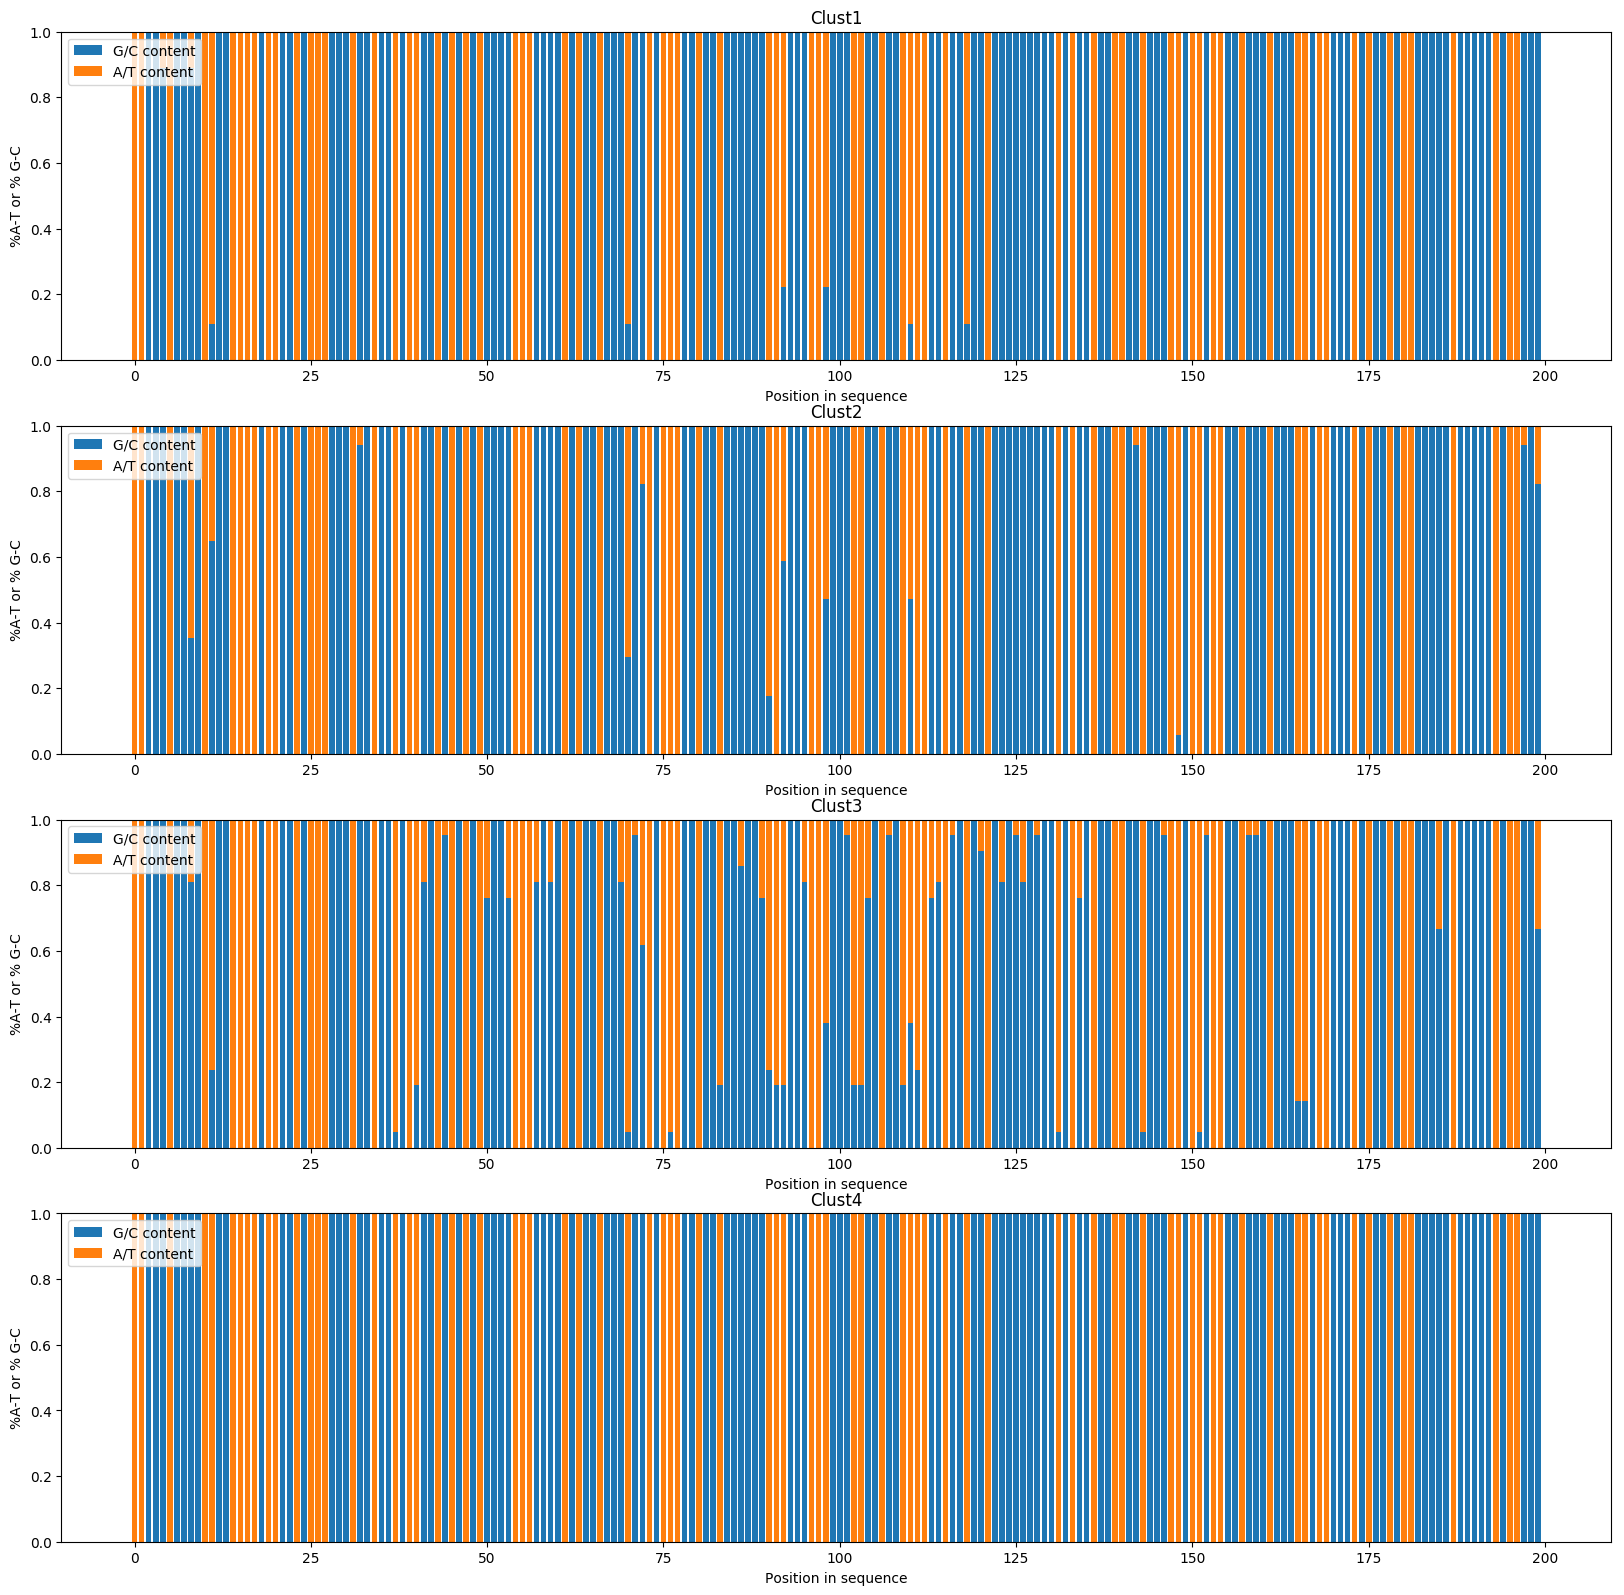

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# seperate parse content in 4 clustres
cNum = 4
c1 = ['hu.39', 'rh.50', 'rh.57', 'rh.51', 'rh.49', 'rh.53', 'rh.64', 'rh.61', 'rh.58']
c2 = ['pi.2', 'pi.3', 'pi.1', 'rh.10', 'bb.1', 'bb.2', 'hu.17', 'hu.6', 'rh.2', 'rh.40', 'hu.67', 'hu.37', 'hu.40', 'hu.66', 'hu.41', 'rh.38', 'hu.42']
c3 = ['cy.3', 'cy.6', 'cy.4', 'cy.5', 'rh.13', 'rh.35', 'rh.36', 'rh.37', 'cy.2', 'rh.54', 'rh.55', 'rh.48', 'rh.62', 'hu.43', 'hu.48', 'hu.44', 'hu.46', 'hu.14', 'hu.31', 'hu.32', 'rh.43']
c4 = ['rh.52']
cList = [c1, c2, c3, c4]
aList = [[], [], [], []]
for rec in SeqIO.parse('seqs.aligned.fa', 'fasta'):
    for i in range(cNum):
        if rec.name in cList[i]:
            aList[i].append(rec)
            break

# count GC content of each base-pair
def GCStatistic(arr):
    length = len(arr[0].seq)
    gc = [0] * length
    total = [0] * length
    for rec in arr:
        for i in range(length):
            if rec.seq[i] != '-':
                total[i] += 1
                if rec.seq[i] == 'G' or rec.seq[i] == 'C':
                    gc[i] += 1
    return [0 if y == 0 else x/y for x,y in zip(gc,total)]    # in case all be '-'
rList = [[], [], [], []]
for i in range(cNum):
    rList[i] = GCStatistic(aList[i])

# plotting
showLength = 200
print('Total base pair: ', len(rList[0]), ". It is too numeric to show. Thus only GC content of first ", showLength, " bp is shown.")
fig = plt.figure(figsize=(20, 20), dpi=100)
for i in range(cNum):
    p1 = plt.bar(range(showLength), height=rList[i][0:showLength], axes=fig.add_subplot(4, 1, i+1))
    p2 = plt.bar(range(showLength), [x-1 for x in rList[i][0:showLength]], bottom=1.0)
    plt.legend(handles=[p1, p2], labels=['G/C content', 'A/T content'], loc='upper left')
    plt.title('Clust' + str(i+1))
    plt.xlabel('Position in sequence'); plt.ylabel('%A-T or % G-C')

Text(0,0.5,'Sequence length')

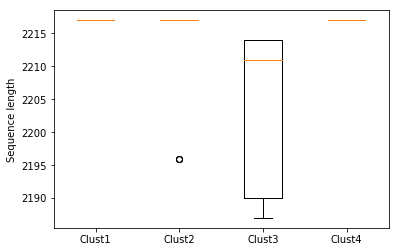

In [13]:
aList=[[], [], [], []]
for rec in SeqIO.parse('seqs.fa', 'fasta'):
    for i in range(cNum):
        if rec.name in cList[i]:
            aList[i].append(rec)
            break
lenList = []
for i in range(cNum):
    lenList.append([len(x.seq) for x in aList[i]])
plt.boxplot(lenList, labels=['Clust1', 'Clust2', 'Clust3', 'Clust4'])
plt.ylabel('Sequence length')